In [1]:
from sympy import *
import numpy as np
import math
import matplotlib.pyplot as plt


Agregando la función de onda prueba: 
\begin{equation}
    \psi_{prueba}(x) = x(a-x)
\end{equation}
y como se trata de una partícula en una caja con longitud a, entonces la ecuación de Schrodinguer es
\begin{equation}
    \frac{d^2\psi}{dx^2} = E\psi
\end{equation}
donde $-a<x<a$


La solución aproximada con el método variacional se puede obtener por medio de la integral variacional
\begin{equation}
    \epsilon = \dfrac{\int \psi(x)^{*} H \psi(x) dx}{\int \psi(x)^{*} \psi(x)dx}
\end{equation}
y si consideramos el valor óptimo que puede tener la energía, entonces se usa la minimización de la integral variacional con la derivada
\begin{equation}
    \frac{d\epsilon}{dx}_{x=a} = 0
\end{equation}


In [91]:
def particula_en_caja_1d(x,l,psi_p):
    '''
        Esta funcion presenta como variable x y como longitud de la caja
        igual a l. 
        Lo que devuelve es la energia dada por la funcion variacional, el valor 
        optimo y una representacion grafica de la funcion de prueba vs la funcion 
        de onda analitica.
    '''
    #Simbolos
    m = Symbol('m')
    h = Symbol('h')
    math.pi = Symbol('pi')

    #Calculos
    H_caja = diff(psi_p,x,2)
    ia = integrate(psi_p*H_caja, (x,0,l))
    ib = integrate(psi_p**2, (x,0,l)) 
    epsilon = ia/ib

    #Arreglos de valores
    k = np.arange(-5,5,0.1)
    psi_exacta = np.sin(np.pi*k)
    #psi_prueba2 = (k**1)*(k-1)**1
    psi_prueba2 = psi_prueba(k,1)

    #Graficacion
    plt.plot(k,psi_exacta)
    plt.plot(k,psi_prueba2)
    plt.show()
    
    return epsilon*(-h**2/(8*m*pi**2))

    

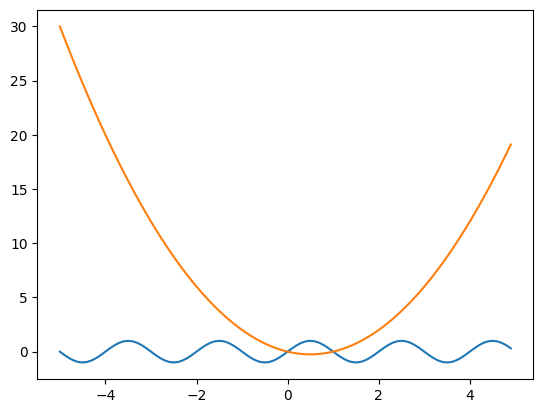

5*h**2/(4*pi**2*l**2*m)

In [92]:
x1 = Symbol('x')
l  = Symbol('l')
psi_prueba = lambda x,a: (x**1)*(x-a)**1

particula_en_caja_1d(x1,l,psi_prueba(x1,l))

ÁTOMO DE HIDROGENO

Tomando como función de prueba

\begin{equation}
    \psi_{prueba} = e^{-cr}
\end{equation}
y la ecuación de Schrodinguer es
\begin{equation}
    \dfrac{-h^2}{8m\pi^2} \dfrac{d^2 \psi}{dr^2} - \frac{1}{4\pi\epsilon_0} \dfrac{e^2}{r} \psi = E \psi
\end{equation}

La solución aproximada se presenta a continuación

In [93]:
def Atomo_De_Hidrogeno(r1,psi_p1):
    '''
        Esta funcion presenta como variable r (dejando constante phi y theta) 
        Lo que devuelve es la  funcion variacional.
    '''

    #Simbolos
    m  = Symbol('m')
    h  = Symbol('h')
    ep = Symbol('epsilon_0')
    e  = Symbol('e')
    mu = Symbol('mu')
    math.pi = Symbol('pi')

    #Calculos
    H_caja = (-h**2/(8*(pi**2)*mu))*(diff(psi_p1,r1,2) + (2/r1)*diff(psi_p1,r1)) -(e**2/(4*pi*ep))*(1/r1)*psi_p1 

    ia = integrate(psi_p1*H_caja*(r**2)*(4*pi), (r1,0,oo))
    ib = integrate(psi_p1**2*(r**2)*(4*pi), (r1,0,oo)) 
    epsilon1 = ia/ib

    return epsilon1

    

In [98]:
#Simbolos
r     = Symbol('r')
theta = Symbol('theta')
phi   = Symbol('phi')
c     = Symbol('c')
mu = Symbol('mu')
m  = Symbol('m')
h  = Symbol('h')
ep = Symbol('epsilon_0')
e  = Symbol('e')
math.pi = Symbol('pi')

psi_prueba_r = lambda k,r1: exp(-k*r1)

Atomo_De_Hidrogeno(r,psi_prueba_r(c,r))

Piecewise((c**3/pi, Abs(arg(c)) < pi/2), (1/Integral(4*pi*r**2*exp(-2*c*r), (r, 0, oo)), True))*Piecewise((h**2/(8*pi*c*mu) - e**2/(4*c**2*epsilon_0), Abs(arg(c)) < pi/2), (Integral(4*pi*r**2*(-e**2*exp(-c*r)/(4*pi*epsilon_0*r) - h**2*(c**2*exp(-c*r) - 2*c*exp(-c*r)/r)/(8*pi**2*mu))*exp(-c*r), (r, 0, oo)), True))

El resultado de la integración de la función variacional es el siguiente

In [99]:
epsilon_H = ( (h**2)/(8*pi*c*mu) - (e**2)/(4*(c**2)*ep) ) * ( c**3/pi)
simplify(epsilon_H)

c**2*h**2/(8*pi**2*mu) - c*e**2/(4*pi*epsilon_0)

Ahora, la minimación de la función variacional para un valor óptimo de c se muestra como sigue

In [100]:
dedc = diff(epsilon_H, c)
dedc

c**3*(-h**2/(8*pi*c**2*mu) + e**2/(2*c**3*epsilon_0))/pi + 3*c**2*(h**2/(8*pi*c*mu) - e**2/(4*c**2*epsilon_0))/pi

Por lo que el valor ótimo de c es:

In [104]:
solve(dedc,c)[0] #Solución a ecuación f'(c) = 0

pi*e**2*mu/(epsilon_0*h**2)